<a href="https://colab.research.google.com/github/cleogrs/analytics/blob/main/Cleo_Gomes_da_Rocha_Santos_Teste_de_hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt


#importando csv
df_ab = pd.read_csv('/content/drive/MyDrive/experimento_teste_ab.csv')

#cabeçalho
print(df_ab.info())
df_ab.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB
None


,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0



Considerando a base de dados experimento_test_ab.csv responda as questões abaixo:

In [ ]:
# @title 1. Qual dos cenários tem a maior taxa de conversão?

visualizacoes = df_ab.groupby('Versão_Página')['Visualizações'].sum()
conversoes = df_ab.groupby('Versão_Página')['Conversões'].sum()
conversao_a = ((conversoes['A'] / visualizacoes['A']) * 100).round(3)
conversao_b = ((conversoes['B'] / visualizacoes['B']) * 100).round(3)
print('Taxa de conversão da versão A: ', conversao_a, '\nTaxa de conversão da versão B: ', conversao_b,'\nO cenário B tem a maior txa de conversão.')

Taxa de conversão da versão A:  0.07 
Taxa de conversão da versão B:  0.083 
O cenário B tem a maior txa de conversão.


In [ ]:
# @title 2. Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios: a. O cenário A, da base, como o inicial, que funciona hoje; b. Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05); c. Também considere 80% de certeza conseguir capturar o efeito da nova abordagem;  d. O aumento para 10% de conversão.

a = df_ab[df_ab['Versão_Página'].isin(['A'])]
n = (2 * (a['Conversões'].var()) * (1.96 + (1-0.8)) ** 2)/(0.10-(conversoes['A'] / visualizacoes['A']))**2

print('Amostra necessária: ', n.round(2))


Amostra necessária:  89.01


In [ ]:
#importando csv
df_pacientes = pd.read_csv('/content/drive/MyDrive/pacientes.csv')

#cabeçalho
print(df_pacientes.info())
df_pacientes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Pressao_Arterial   1000 non-null   float64
 2   Idade              1000 non-null   int64  
 3   Genero             1000 non-null   int64  
 4   Etnia              1000 non-null   int64  
 5   Estado_Saude       1000 non-null   int64  
 6   Nome_Genero        1000 non-null   object 
 7   Nome_Etnia         1000 non-null   object 
 8   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB
None


,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas Responda as perguntas abaixo:

In [ ]:
# @title 3. Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,  89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

#H0: idade média das pessoas com problemas cardíacos é maior que 50 anos
#H1: idade média das pessoas com problemas cardíacos é menor ou igual a 50 anos


#separando os índices
ids = ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280,
               232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895,
               217, 224, 311, 348, 146, 505, 273, 957, 362])
amostra = df_pacientes.iloc[ids]

teste_idade = stats.ttest_1samp(amostra['Idade'], 50)
pvalue = teste_idade.pvalue
alpha = 0.05

if pvalue < alpha:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")



Não rejeitamos a hipótese nula.


In [ ]:
# @title 4. Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

#H0: Os grupos são dependentes com base na pressão arterial
#H1: Os grupos são independentes com base na pressão arterial

sem_comorbidade = amostra[amostra['Nome_Estado_Saude'].isin(['Saudável'])]
comorbidade = amostra[amostra['Nome_Estado_Saude'].isin(['Com condições de saúde adicionais'])]

teste1 = stats.ttest_ind(sem_comorbidade['Pressao_Arterial'], comorbidade['Pressao_Arterial'])

pvalue1 = teste1.pvalue

if pvalue1 < alpha:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

print('Os grupos, aparentemente, se levarmos em consideração apenas a categorização saudável e com condições de saúde adicionais, seriam independentes. \nPorém, com a análise do teste t de student utilizando os dados de pressão arterial, não rejeita-se a hipótese nula de que os grupos são dependentes.')


Não rejeitamos a hipótese nula.
Os grupos, aparentemente, se levarmos em consideração apenas a categorização saudável e com condições de saúde adicionais, seriam independentes. 
Porém, com a análise do teste t de student utilizando os dados de pressão arterial, não rejeita-se a hipótese nula de que os grupos são dependentes.


In [ ]:
# @title 5. Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe,  índices = ([690, 894,  67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174, 105, 693,   6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

#H0 : PA no grupo sem comorbidade é igual a PA no grupo com comorbidade
#H1 : PA no grupo sem comorbidade é diferente da PA no grupo com comorbidade

ids2 =  ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372])
amostra2 = df_pacientes.iloc[ids2]

sem_comorbidade2 = amostra2[amostra2['Nome_Estado_Saude'].isin(['Saudável'])]
pa_sem_comorbidade = sem_comorbidade2['Pressao_Arterial']

comorbidade2 = amostra2[amostra2['Nome_Estado_Saude'].isin(['Com condições de saúde adicionais'])]
pa_comorbidade = comorbidade2['Pressao_Arterial']

teste_pa = stats.ttest_ind(pa_comorbidade, pa_sem_comorbidade)
pvalue2 = teste_pa.pvalue
alpha2 = 0.06


if pvalue2 < alpha2:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")


Não rejeitamos a hipótese nula.


In [ ]:
# @title 6. Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%). a.Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos. ; c.Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

afro = df_pacientes[df_pacientes['Nome_Etnia'].isin(['Afro-americano'])]
asiatico = df_pacientes[df_pacientes['Nome_Etnia'].isin(['Asiático'])]
caucasiano = df_pacientes[df_pacientes['Nome_Etnia'].isin(['Caucasiano'])]
hispanico = df_pacientes[df_pacientes['Nome_Etnia'].isin(['Hispânico'])]

pa_afro = afro['Pressao_Arterial']
pa_asiatico = asiatico['Pressao_Arterial']
pa_caucasiano = caucasiano['Pressao_Arterial']
pa_hispanico = hispanico['Pressao_Arterial']



etnia_pa_anova = stats.f_oneway(pa_afro, pa_asiatico, pa_caucasiano, pa_hispanico)
pvalue3 = etnia_pa_anova.pvalue

if pvalue3 < alpha:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")


Não rejeitamos a hipótese nula.


In [ ]:
# @title b.Existe uma associação entre a idade dos pacientes e sua pressão arterial? b.i. Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial; b.ii. Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial.

pa_idade = pd.crosstab(df_pacientes['Idade'], df_pacientes['Pressao_Arterial'])

chi2, pvalue4, graus_liberdade, esperado = chi2_contingency(pa_idade)


if pvalue4 < alpha:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")



Não rejeitamos a hipótese nula.


In [ ]:
# @title 7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

#H0: Há relaçao entre sexo e condições de saúde adicionais
#H1: Não há relação entre sexo e condições de saúde adicionais

genero_comorbidade = pd.crosstab(df_pacientes['Nome_Genero'], df_pacientes['Nome_Estado_Saude'])

chi2, pvalue5, graus_liberdade, esperado = chi2_contingency(genero_comorbidade)


if pvalue5 < alpha:
    print("Rejeitamos a hipótese nula.")
else:

    print("Não rejeitamos a hipótese nula.")



Não rejeitamos a hipótese nula.


In [ ]:
# @title 8. Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

# Calcular a média e o desvio padrão da pressão arterial
media_pa_comorbidade = np.mean(comorbidade['Pressao_Arterial'])
dp_pa_comorbidade= np.std(comorbidade['Pressao_Arterial'], ddof=1)

# Tamanho da amostra
n = len(comorbidade['Pressao_Arterial'])

# Nível de confiança (95%)
nc = 0.05

valor_critico_z = stats.norm.ppf(1 - alpha / 2)


# Calcular o erro padrão da média
erro_padrao = dp_pa_comorbidade / np.sqrt(n)

# Calcular o intervalo de confiança

limite_superior = media_pa_comorbidade + valor_critico_z * erro_padrao
limite_inferior = media_pa_comorbidade - valor_critico_z * erro_padrao

print('Limite inferior: ',limite_inferior, '\nLimite superior: ', limite_superior)


Limite inferior:  144.72491673479112 
Limite superior:  154.16775020044292


In [ ]:
# @title 9. A distribuição da pressão arterial na população segue uma distribuição normal? a.Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal; b.Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.

testeks = stats.ks_2samp(sem_comorbidade['Pressao_Arterial'], comorbidade['Pressao_Arterial'])

media_pa = np.mean(df_pacientes['Pressao_Arterial'])
dp_pa = np.std(df_pacientes['Pressao_Arterial'], ddof=1)

# Realizando o teste KS para comparar a amostra com a distribuição de referência
teste_pa = stats.kstest(df_pacientes['Pressao_Arterial'], 'norm', args=(media_pa, dp_pa))

# Obtendo o valor p e o estatístico D do resultado do teste
pvalue_pa = teste_pa.pvalue
estatistico_D = teste_pa.statistic

# Exibindo os resultados
print("Estatístico D:", estatistico_D)
print("Valor p:", pvalue_pa)

# Interpretando o resultado

if pvalue_pa < 0.05:
    print("Há evidências suficientes para rejeitar a hipótese nula. A amostra segue uma distribuição normal.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. A amostra segue a distribuição de referência.")


Estatístico D: 0.02051963188317471
Valor p: 0.7856894546948019
Não há evidências suficientes para rejeitar a hipótese nula. A amostra segue a distribuição de referência.


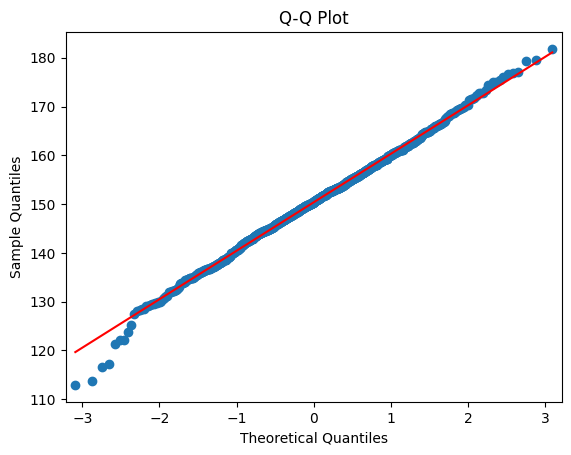

In [ ]:
media_pa, dp_pa = np.mean(df_pacientes['Pressao_Arterial']), np.std(df_pacientes['Pressao_Arterial'])

# Plotando o Q-Q plot
fig = sm.qqplot(np.array(df_pacientes['Pressao_Arterial']), line='s')  # 's' para linha de referência diagonal
plt.title('Q-Q Plot')
plt.show()

Como os pontos no gráfico seguem predominantemente a linha diagonal, pode-se dizer que a amostra segue a distribuição normal.